# Modules

In [41]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Shears

In [42]:
shears = []

for i in range(1, 4):

    shear2 = sa.find_shear("data/v{}_nsp_not_sheared.csv".format(i), "data/v{}_nsp_sheared.csv".format(i), plot = False, smoothing_period = 1/80, how = "slope")
    shear = sa.find_shear("data/v{}_sp_not_sheared.csv".format(i), "data/v{}_sp_sheared.csv".format(i), plot = False, smoothing_period = 1/80, how = "slope")
    print("v{} - sp".format(i))
    print(shear)
    print("v{} - nsp".format(i))
    print(shear2)
    print("\n")
    shears.append(np.abs(shear)-np.abs(0))
#shears = [shears[1], shears[1], shears[1]]
print(shears)

v1 - sp
0.021932707437351838
v1 - nsp
0.00317091576910326


v2 - sp
0.022487530460619923
v2 - nsp
0.003589151633004605


v3 - sp
0.022260217523863757
v3 - nsp
0.0031240574005612417


[0.021932707437351838, 0.022487530460619923, 0.022260217523863757]


Starting SPIDER calculations.

1/3
2/3
3/3

Yaaay! Everything seems fine!



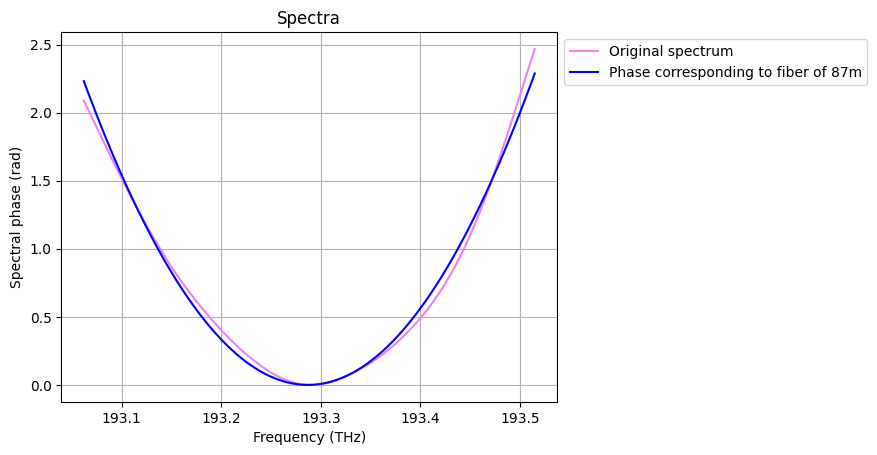

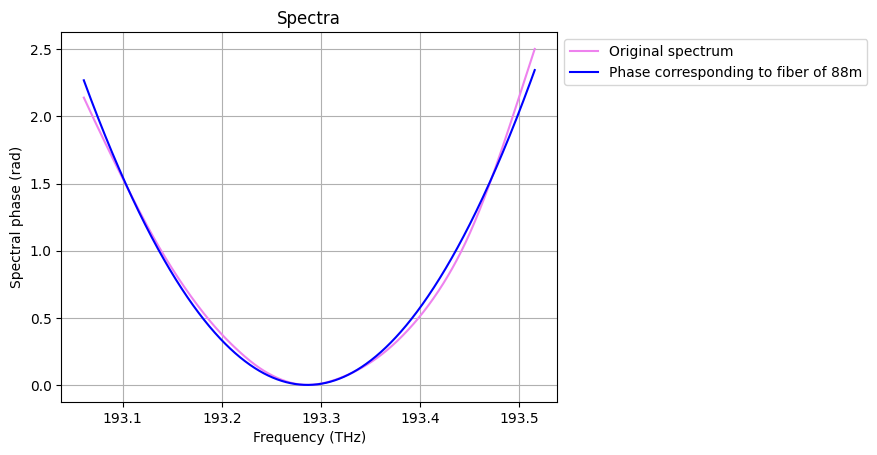

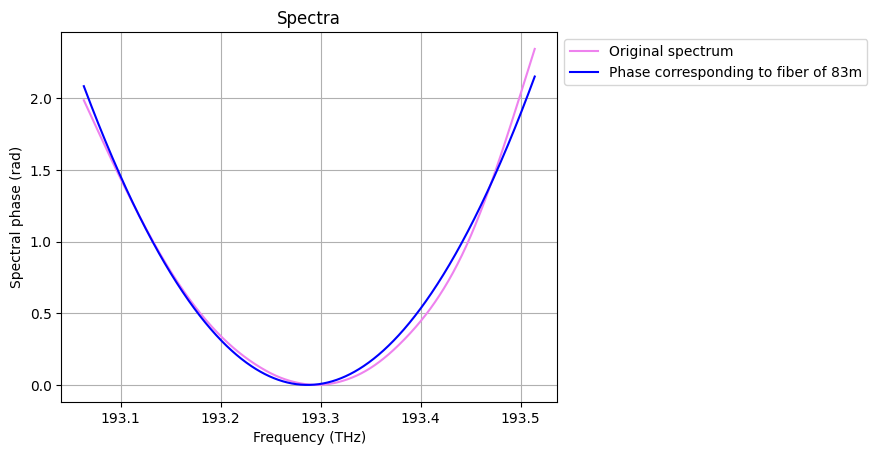

In [37]:
phases = []

print("Starting SPIDER calculations.\n")

for i in range(3):
    phase = sa.spider(phase_spectrum = "data/v{}_p_spectrum.csv".format(i+1),
                      temporal_spectrum = "data/v{}_t_spectrum.csv".format(i+1),
                      shear = shears[i],
                      smoothing_period = round(1/15, 3),
                      plot_phase = False,
                      plot_steps = False,
                      what_to_return = "phase"
                      )[1]
    if np.mean(phase.Y) < 0 : phase.Y *= -1
    phases.append(phase)
    print("{}/{}".format(i+1, 3))

print("\nYaaay! Everything seems fine!\n")


for i in range(3):
    fiber = sa.fit_fiber_length(phases[i], plot = True)